<a href="https://colab.research.google.com/github/10Academy-Group-4/Week-4/blob/data_preprocess_mubby/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/10Academy-Group-4/ALFFA_PUBLIC.git

Cloning into 'ALFFA_PUBLIC'...
remote: Enumerating objects: 66024, done.
^C


In [ ]:
rm -rf sample_data

In [ ]:
rm -rf ALFFA_PUBLIC

In [ ]:
!pip install torchaudio

In [ ]:
import math, random
import torch
import torchaudio
import numpy as np
import pandas as pd
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import keras
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('modules')))
from Metadata import MetaCreate

In [ ]:
meta=MetaCreate()
meta_data=meta.generate_meta_data()

In [ ]:
meta_data.head()

,file,text,path,sample_rate,channels,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.10
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.65
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.90
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,2.94
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,2.45


In [ ]:
meta_data.channels.value_counts()

1    10179
Name: channels, dtype: int64

Loading Sample Audio File

In [ ]:
train_audio_path = 'data/train/wav/SWH-05-20101106/'
sample, sample_rates = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav')
print(sample)
print(sample_rates)

[ 0.00949342  0.01522155  0.01770687 ... -0.21883075 -0.20150991
  0.        ]
22050


In [ ]:
audio, rate=librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav')

In [ ]:
ipd.Audio(sample, rate=sample_rates)

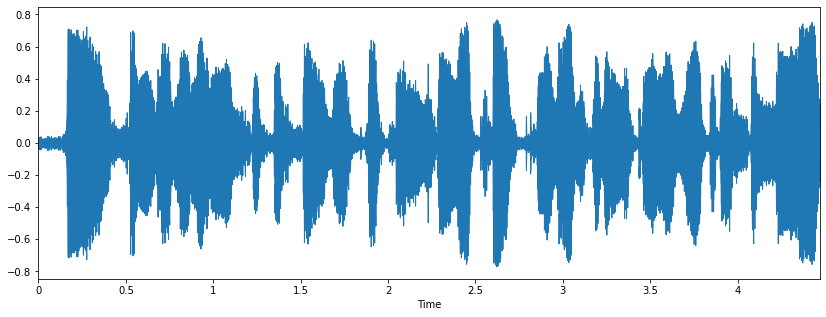

In [ ]:
# plotting the wave plot  
plt.figure(figsize=(14,5))
sample, sample_rates = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav')
librosa.display.waveplot(sample, sr=sample_rates)

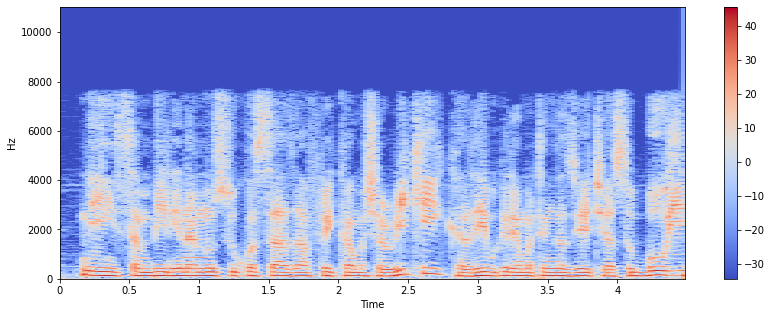

In [ ]:
#display Spectrogram
X = librosa.stft(sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rates, x_axis='time', y_axis='hz') 
#If to print log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 193)


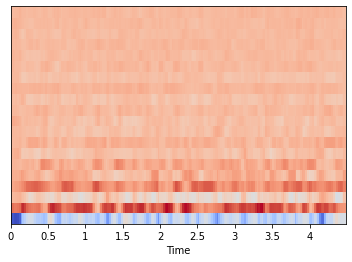

In [ ]:
mfccs = librosa.feature.mfcc(sample, sr=16000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rates, x_axis='time')

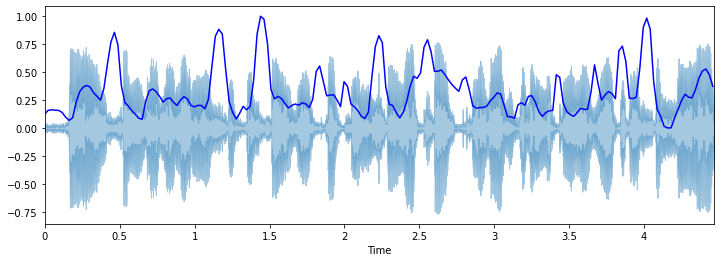

In [ ]:
#Plots Spectral Centroid 

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(sample, sr=sample_rates)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample, sr=sample_rates, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


# Spectral centroid is used to locate where the 'center of mass' of a sound is located

In [ ]:
train_audio_path = 'data/train/wav/SWH-05-20101106/'
samples, sample_rate = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part3.wav')
print(samples)
print(sample_rate)

[ 0.02666823  0.03076     0.02397061 ... -0.14377044 -0.1552949
 -0.09687205]
22050


In [ ]:
audio2, rate=librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part3.wav')

In [ ]:
ipd.Audio(samples, rate=sample_rate)

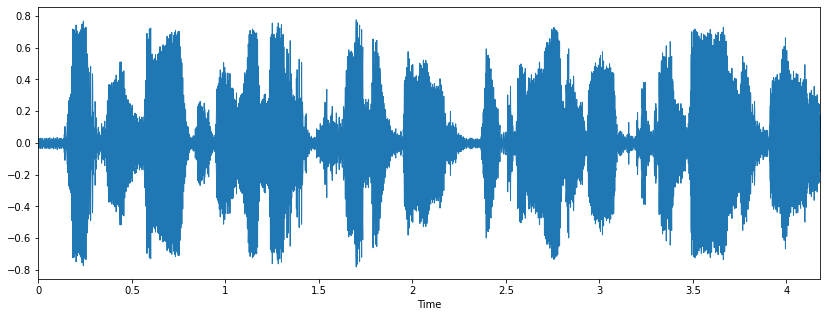

In [ ]:
# plotting the wave plot 
plt.figure(figsize=(14,5))
samples, sample_rate = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part3.wav')
librosa.display.waveplot(samples, sr=sample_rate)

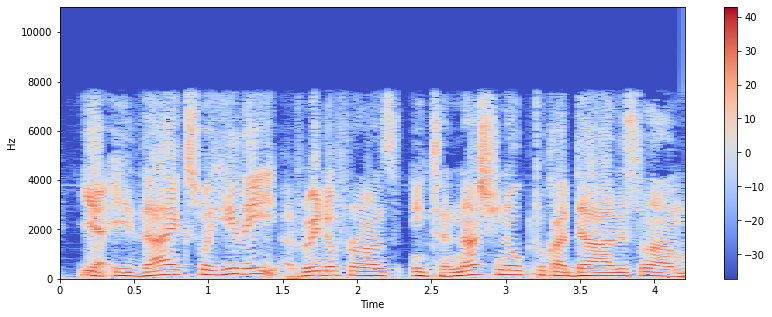

In [ ]:
#display Spectrogram
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 181)


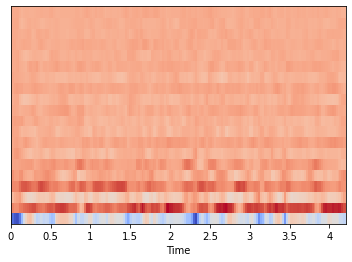

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=16000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

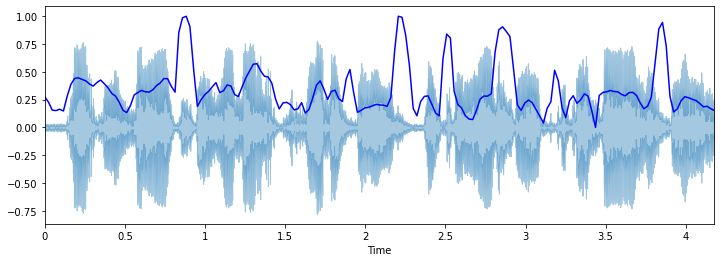

In [ ]:
#Plots Spectral Centroid 

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(samples, sr=sample_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


# Spectral centroid is used to locate where the 'center of mass' of a sound is located

# Loading Transcription

In [ ]:
transcription = meta.load_transcription()

In [ ]:
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100': 'yanayo andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101': 'inayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102': 'juma hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103': 'wakipiga kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104': 'kule abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105': 'walipata fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106': 'waziri mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107': 'na rais aliyetangulia henry konan berd

In [ ]:
meta_data

,file,text,path,sample_rate,channels,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.650000
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,data/train/wav/SWH-05-20101106/SWH-05-20101106...,16000,1,2.450000
...,...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,data/train/wav/SWH-15-20110310/SWH-15-20110310...,16000,1,2.500062
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,data/train/wav/SWH-15-20110310/SWH-15-20110310...,16000,1,2.910000
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,data/train/wav/SWH-15-20110310/SWH-15-20110310...,16000,1,2.950000
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,data/train/wav/SWH-15-20110310/SWH-15-20110310...,16000,1,2.590000


In [ ]:
from tqdm import tqdm
from Audio import AudioUtil
audioutil = AudioUtil()

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split

# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'relative_path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'classID']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = audioUtil.pad_trunc(rechan, self.duration)
    shift_aud = audioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = audioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = audioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id

In [ ]:
from torch.utils.data import random_split

myds = SoundDS(meta_data, train_audio_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

In [ ]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')
  
num_epochs=2   # Just for demo, adjust this higher.
training(myModel, train_dl, num_epochs)

KeyError: ignored

In [ ]:
from torch.utils.data import random_split

myds = SoundDS(meta_data, train_audio_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

In [ ]:
### Load all the audio files
audioTranscript_files=[]
for index_num,row in tqdm(meta_data.iterrows()):
    file_name = os.path.join(str(row["path"]))
    final_class_labels=row["text"]
    data=audioutil.open(file_name)
    audioTranscript_files.append([data,final_class_labels])
    if index_num == 4000:
      break

3871it [00:03, 1190.01it/s]


In [ ]:
# saving list
audioTranscript_files=pd.DataFrame(audioTranscript_files,columns=['audio','text'])
audioTranscript_files.shape

(4001, 2)

In [ ]:
import tensorflow as tf

In [ ]:
# since we want to change our file to stereo, we will assign the channel to be  2
channel= 2
### Now we iterate the first 100 audio file and change the channel 
changes_channel=[]
for index_num,row in tqdm(audioTranscript_files.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.rechannel(file_name,channel)
    changes_channel.append([data,final_class_labels])

4001it [00:01, 2311.33it/s]


In [ ]:
# saving list
changes_channel=pd.DataFrame(changes_channel,columns=['audio','text'])
changes_channel.head()

,audio,text
0,"([[tensor(0.0048), tensor(0.0061), tensor(0.00...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.0091), tensor(0.0082), tensor(0.00...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(-0.0113), tensor(-0.0111), tensor(-0...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.0109), tensor(0.0133), tensor(0.01...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.0023), tensor(0.0009), tensor(0.00...",kule abidjan raia wa jiji hilo


In [ ]:
# Since Resample applies to a single channel, we resample one channel at a time
# new sample Rate for all the audio file will be the most common one which is 16000
newsr = 16000
resampling_audio=[]
### Now we iterate through every audio file and resamples the audio
for index_num,row in tqdm(changes_channel.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.resample(file_name,newsr)
    resampling_audio.append([data,final_class_labels])

4001it [00:00, 12376.02it/s]


In [ ]:
# saving list
resampling_audio=pd.DataFrame(resampling_audio,columns=['audio','text'])
resampling_audio.head()

,audio,text
0,"([[tensor(0.0048), tensor(0.0061), tensor(0.00...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.0091), tensor(0.0082), tensor(0.00...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(-0.0113), tensor(-0.0111), tensor(-0...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.0109), tensor(0.0133), tensor(0.01...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.0023), tensor(0.0009), tensor(0.00...",kule abidjan raia wa jiji hilo


In [ ]:
# The maximum audio length we have in the data set is 6.15 sec, so we will try to resize 
# all the data to the maximum length.
max_ms = 6150
resizing_Length=[]
### Now we iterate through every audio file and resizes to the same length
for index_num,row in tqdm(resampling_audio.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.pad_trunc(file_name,max_ms)
    resizing_Length.append([data,final_class_labels])

4001it [00:03, 1304.80it/s]


In [ ]:
# saving list
resizing_Length=pd.DataFrame(resizing_Length,columns=['audio','text'])
resizing_Length.head()

,audio,text
0,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",kule abidjan raia wa jiji hilo


In [ ]:
tf.ragged.constant(resizing_Length.audio)

ValueError: ignored

In [ ]:
# The time shift we will use for this data set sr/10
sr = 1600
shift_limit = sr/10
Data_Augments=[]
### Now we iterate through every audio file and resizes to the same length
for index_num,row in tqdm(resizing_Length.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.time_shift(file_name,shift_limit)
    Data_Augments.append([data,final_class_labels])

4001it [00:02, 1447.64it/s]


In [ ]:
# saving list
Data_Augments=pd.DataFrame(Data_Augments,columns=['audio','text'])
Data_Augments.shape

(4001, 2)

In [ ]:
# saving list
Data_Augments=pd.DataFrame(Data_Augments,columns=['audio','text'])
Data_Augments.head()

,audio,text
0,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(-0.0929), tensor(-0.0888), tensor(-0...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(-0.1560), tensor(-0.0963), tensor(0....",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",kule abidjan raia wa jiji hilo


In [ ]:
### Now we iterate through every audio file and extracts feature
Feature_Extraction = []
for index_num,row in tqdm(Data_Augments.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.spectro_gram(file_name, n_mels=64, n_fft=1024, hop_len=None)
    Feature_Extraction.append([data,final_class_labels])

4001it [00:15, 252.07it/s]


In [ ]:
Feature_Extraction=pd.DataFrame(Feature_Extraction,columns=['audio','text'])
Feature_Extraction.head()

,audio,text
0,"[[[tensor(-42.5916), tensor(-42.5916), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"[[[tensor(2.9780), tensor(10.7800), tensor(9.0...",inayokutangazia moja kwa moja kutoka jijini da...
2,"[[[tensor(-2.3930), tensor(-1.6809), tensor(-1...",juma hili bara la afrika limeshuhudia raia wa ...
3,"[[[tensor(-42.4161), tensor(-42.4161), tensor(...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"[[[tensor(-39.4204), tensor(-39.4204), tensor(...",kule abidjan raia wa jiji hilo


In [ ]:
features = np.asarray(Feature_Extraction.audio)
classes = np.asarray(Feature_Extraction.text)

In [ ]:
type(features)

numpy.ndarray

# Deep Learning Architecture

In [ ]:
!pip install livelossplot

In [ ]:
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras

train_data, validation_data, train_classes, validation_classes = train_test_split(features, classes,
                                                                      test_size=0.30, random_state=42, shuffle=True)

In [ ]:
keras.backend.clear_session() # clear previous model (if cell is executed more than once)

### CNN MODEL DEFINITION ###
model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(99, 20)))

model.add(keras.layers.Conv1D(64, kernel_size=8, activation="relu"))
model.add(keras.layers.MaxPooling1D(pool_size=3))

model.add(keras.layers.Conv1D(128, kernel_size=8, activation="relu"))
model.add(keras.layers.MaxPooling1D(pool_size=3))

model.add(keras.layers.Conv1D(256, kernel_size=5, activation="relu"))
model.add(keras.layers.GlobalMaxPooling1D())

model.add(keras.layers.Dense(128, activation="relu"))

model.add(keras.layers.Dense(64, activation="relu"))

model.add(keras.layers.Dense(12, activation='softmax'))

# print model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 92, 64)            10304     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 128)           65664     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 256)            164096    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [ ]:
sgd = keras.optimizers.SGD()
loss_fn = keras.losses.SparseCategoricalCrossentropy() # use Sparse because classes are represented as integers not as one-hot encoding

model.compile(optimizer=sgd, loss=loss_fn, metrics=["accuracy"])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
plt.close()

history = model.fit(train_data, 
                    validation_classes, 
                    batch_size=32, 
                    epochs=4, 
                    validation_data=(validation_data, validation_classes),
                    callbacks=[PlotLossesKeras(), early_stopping])

ValueError: ignored